# Investment and Trading Project

### Domain Background

This is an attempt to use information about past stock prices to predict future prices in the investment and trading domain.
While there are multiple factors that can affect stock pricing – economic, political, social etc., we will
use only the past stock prices themselves to solve a classification problem (buy or sell) or a regression problem (close price).
My main motivation for this project is to learn how to effectively solve a time-series problem with a LSTM as the neural network. This is related to a side-project of mine whose data i cannot use in this project for proprietary reasons. 

There have been multiple works in academia that incorporate RNN and specifically LSTM for stock market prediction. [1] is an interesting paper where the authors have used different networks to derive useful stats about the stock but finally rely on LSTM to do the prediction. [2] is another paper where LSTM was employed to predict stock prices in the china market.

I plan to use information about stock by using the python APIs in quandl. A sample usage in python after pip install quandl is
import quandl
data = quandl.get("WIKI/AAPL")

### Problem Statement

All traders do wish to be able to foretell the price of a particular stock as it amounts to significant wealth (or loss).
There have been many attempts to use statistical analysis and machine learning to predict stock prices.
In this project, I wish to use deep learning to solve this problem. Specifically, I would like to tackle this
as a time series problem and use LSTM to do the prediction. LSTM has a unique ability to be able to maintain
state across sequences and hence I believe it would be a good fit for this problem.
The main questions I would like to answer are:
1. What is predicted Adj Close Adj Close of a stock based on N days of data.
2. Is the stock predicted to go Up or Down or NoChange based on N days of data.

The first is a regression problem while the second is a classification problem. I plan to tackle the regression problem and may optionally try to work out the classification problem by building a final layer to predict the class label.

### Datasets and Inputs

I plan to use the data sets that is publicly available using Quandl. This is how the data looks like:
Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
2017-12-20,174.87,175.42,173.25,174.35,23475649.0,0.0,1.0,174.87,175.42,173.25,174.35,23475649.0
2017-12-19,175.03,175.39,174.09,174.54,27436447.0,0.0,1.0,175.03,175.39,174.09,174.54,27436447.0

I do plan to store up the dataset locally before playing around with it. However, the initial one can be downloaded using QUandl python APIs
qcom_data = quandl.get("WIKI/QCOM")

Quandl provides stock information for numerous stocks/bonds/etf. I plan to use stocks listed in the WIKI database. The stocks i am interested in are "WIKI/INTC", "WIKI/QCOM", "WIKI/NVDA", "WIKI/TXN", "WIKI/BRCM" and "WIKI/GOOG". These are primarily semi-conductor companies except for google. Also, dataset has stock prices sinces its inception but i plan to use only the data from 2006 onward. A sample plot for dataset from 2006 to 2015 shows that there is sufficient variations in Adjusted close to make this an interesting problem to solve

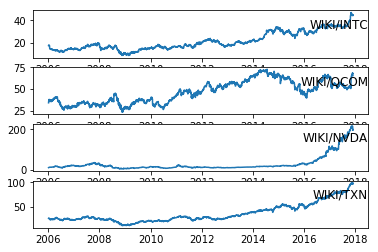

In [4]:
import quandl

plt.figure()
items = ["WIKI/INTC", "WIKI/QCOM", "WIKI/NVDA", "WIKI/TXN"]
i = 1
for item in items:
    plt.subplot(len(items), 1, i)
    data = quandl.get(item, start_date='2006-01-01', end_date='2017-12-01')
    plt.plot(data['Adj. Close'])
    plt.title(item, y=0.5, loc='right')
    i += 1
plt.show()

Each stock is going to be modelled seperately. Hence, we will have a model for each stock. Further more, since this is a time-series problem we don't want to shuffle our data set for train and test. I plan to use only a train/test split. To avoid look ahead bias, I will keep the dataset from 2016-01-01 onward as a test set and train on the older dataset. I am not sure if i can employ a train/validation/test split without introducing look-ahead bias.

### Solution Statement

The input data downloaded from Quandl has many more columns than required. My current intuition is to remove Dividend,Split,Adj_Open,Adj_High,Adj_Low and Adj_Volume columns. Also, there are a few indexes that take into account strength of a stock based on past performane such as Relative Stock Index (RSI), Simple Moving Average (SMA), Average Directional Index (ADX), Sharpe Ratio and a few others. I plan to add these also as part of the input features. I would then run the data through a KMeans algorithm to look for relations between the various features using scatter plot. This may help to better choose the features that I would need for the final model. A few technical indicators that were considered useful are listed in this paper [3]. Additionally, these additional parameters would help to make a prediction that is future looking i.e. predict the Adj. Close price after 7/14/28 days.

The input data is to be scaled down to a (0 to 1) range. I plan to use LSTM as my final model. However, there is a good chance that a regression algorithm such as Support Vector Regressor performs well.

### Benchmark Model

Considering it is a time-series problem, i plan to predict the same value (rounded to closest decimal) as previous day as the baseline model for the regression problem. 


### Evaluation Metrics

Since this is a time-series problem, i want to ensure that the train and test data are represented as-is i.e. without shuffling. I plan to use sklearn's TimeSeriesSplit. TimeSeriesSplit will allow me to create multiple train/test splits so that I can get more robust estimate. It also has the added advantage extending the training data with test sets that were seen in previous test runs thereby improving the model with more recent data without inducing look ahead bias. Since we want to evaluate on future values, the train split will contain the older 70% of the data. I plan to use Root Mean Square Error (RMSE) as the metric for the regression problem.
To ensure apple-to-apple comparision, we will use the same metric on both the benchmark and the solution model.


### Project Design

This is the work flow i plan to use as part of the Project implementation
#### 1. Data Preprocessing:
The data as-is has many columns which may not be useful. I plan to remove some while adding a few more indicators that mathematically model charactersitics of a stock. Each stock is going to be modelled seperately. We will use Open, High, Low, Close, Volume and a few more variables as input and Adj Close as output. We can also use a moving average for 7 days into the future to predict the stock's Adj close price.

#### 2. Visualize data:
I hope to create some plots such as scatter plots to try to understand any relationship between the different features. A description of my input data set will also help better understand the stats underlying it.

#### 3. Implement Baseline model
Will implement a baseline model using the ideas outlined earlier. This should help me evaluate the final solution model on its performance.

#### 4. Train a Model
The data will then be re-scaled to a (0-1) range before passing it to a model. I plan to build both models using LSTM. Hence, i have to first define the input_dim (batch_size, timesteps, features). The LSTM layer will be followed by a dense layer. I may add dropout to reduce overfitting. I will also use early stopping to avoid creating a model that overfits the data. I plan to use "mae" as the loss function and the "adam" optimizer to compile the model.

#### 5. Evaluate the model
Model evaluation is primarily to understand if the solution model is overfitting or underfitting to the dataset. I would graph the runs for both the training and test data to understand the model characteristic. I may then have to iterate by tuning the model (its layers, hyperparameters etc) to ensure that it is suitable for prediction.

##### 6. Prediction
We are now ready to use the model to predict the Adj. close of the stock. We will need to rescale the prediction output to the actual input values. We can now compare our solution against the baseline model. Predicting a single time step ahead may be more accurate but less useful. So i want to be able to predict a few days ahead. To improve such a prediction, i plan to use a sliding window where predicted values are reused for future prediction.

I do want to create a frontend for the solution where a user can provide a stock ticker and a date-range. This info can be provided via a REST API and the server end would download the necessary data to train a model that can be used to give a prediction. I will give it a shot only if I don't have time/resource constraints. My main objective is to be able to create a decent model based on my learnings from the course.

References:

[1] 
http://snap.stanford.edu/class/cs224w-2015/projects_2015/Predicting_Stock_Movements_Using_Market_Correlation_Networks.pdf

[2] 
http://ieeexplore.ieee.org/document/7364089/

[3] https://etd.auburn.edu/bitstream/handle/10415/5652/Application%20of%20machine%20learning%20techniques%20for%20stock%20market%20prediction.pdf?sequence=2